### **Descrição da ponderada:**

Objetivo: Otimizar um modelo de rede neural pré-treinado para detecção de fraudes em cartões de crédito. Aplicar técnicas avançadas de ajuste fino de hiperparâmetros, como grid search e random search, com o objetivo de aprimorar as métricas de desempenho do modelo, incluindo precisão, recall, F1-score e AUC-ROC. A atividade também exige uma comparação entre o modelo otimizado e o modelo original, permitindo avaliar o impacto das modificações nos hiperparâmetros sobre o desempenho geral.

In [8]:
%pip install gdown keras_tuner pandas numpy matplotlib tensorflow seaborn scikit-learn
import gdown

  Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl (8.7 MB)
Using cached scipy-1.16.1-cp312-cp312-win_amd64.whl (38.5 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ---------------------

In [2]:
arquivo_destino_colab = "dataset.csv"
doc_id = "1u_OWAPkIdgJw1ah5xP_dGBFMSANxjxEl"
URL = f"https://drive.google.com/uc?id={doc_id}"
gdown.download(URL, arquivo_destino_colab, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1u_OWAPkIdgJw1ah5xP_dGBFMSANxjxEl
From (redirected): https://drive.google.com/uc?id=1u_OWAPkIdgJw1ah5xP_dGBFMSANxjxEl&confirm=t&uuid=b840fb45-2ee1-4d4a-a91a-32a75d0849b3
To: c:\Users\Inteli\Documents\github\modulo11\pond\dataset.csv
100%|██████████| 151M/151M [02:39<00:00, 947kB/s]  


'dataset.csv'

# Importar o Dataset

In [1]:
import pandas as pd
df = pd.read_csv('dataset.csv')

# Análise do Dataset

In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Análise das Distribuições

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram(df, column):
  """
  Gera um histograma para uma coluna específica de um DataFrame.

  Args:
    df: DataFrame do pandas.
    column: Nome da coluna para gerar o histograma.
  """
  plt.figure(figsize=(10, 6))
  sns.histplot(data=df, x=column, kde=True)
  plt.title(f'Histograma de {column}')
  plt.xlabel(column)
  plt.ylabel('Frequência')
  plt.show()

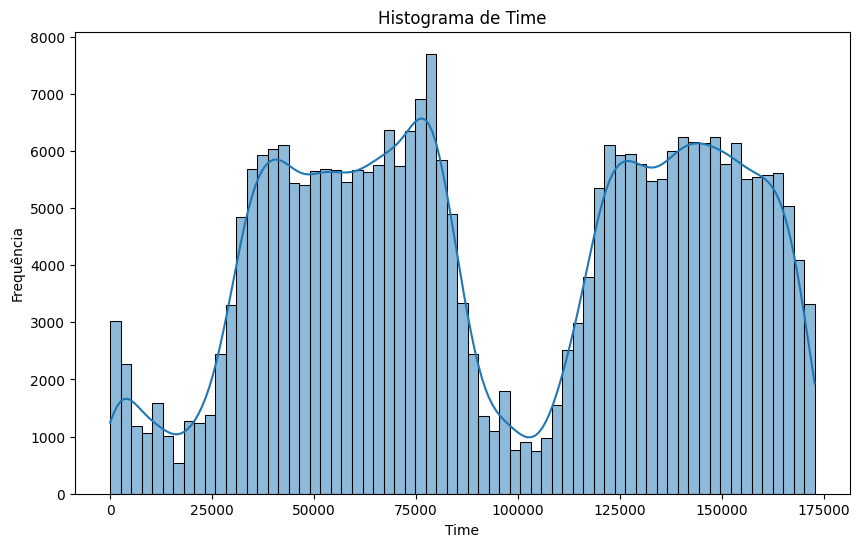

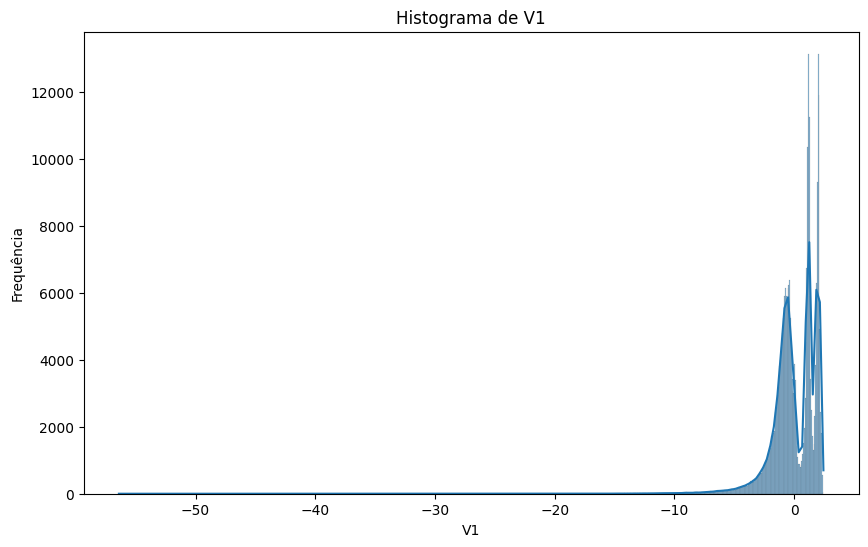

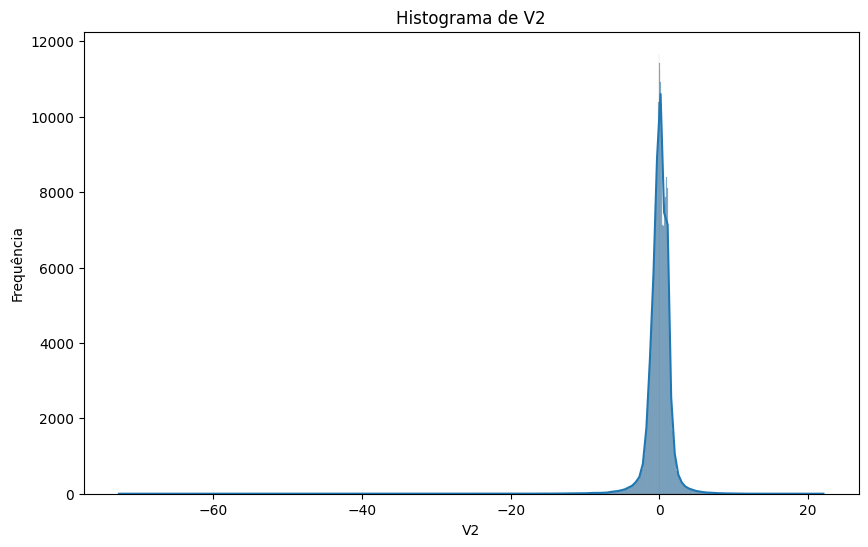

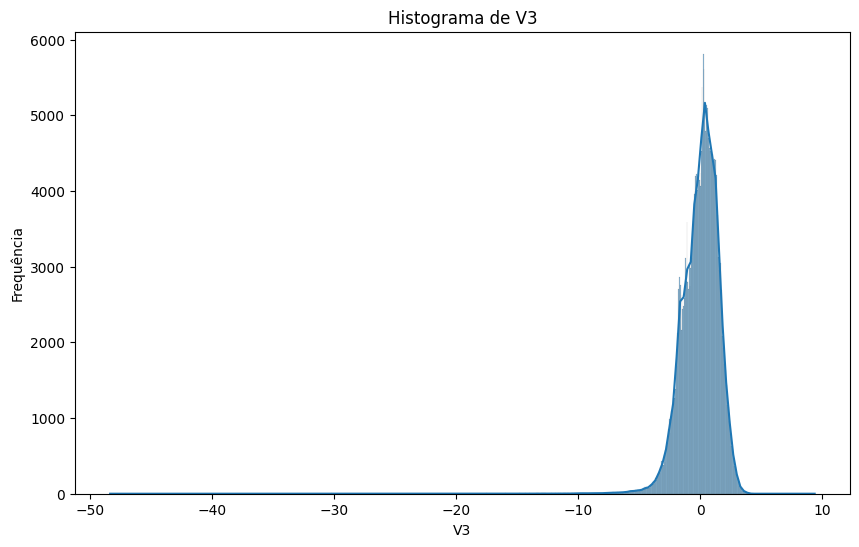

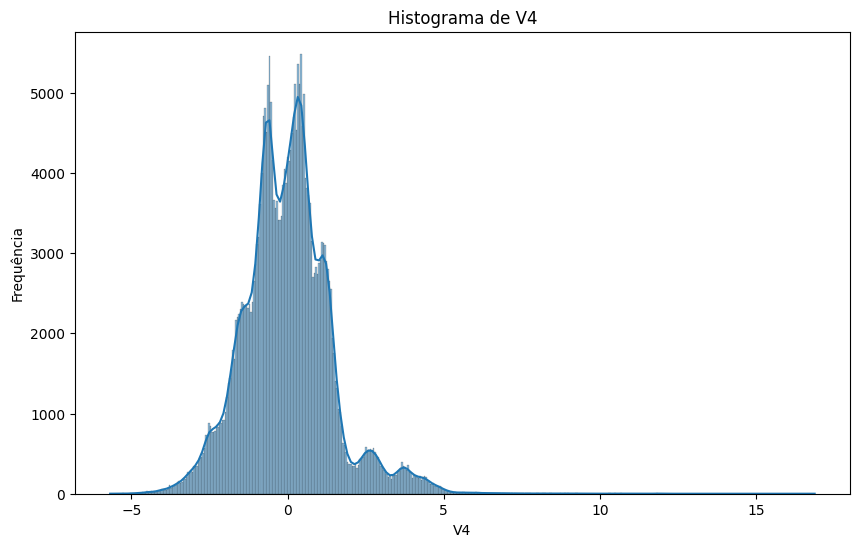

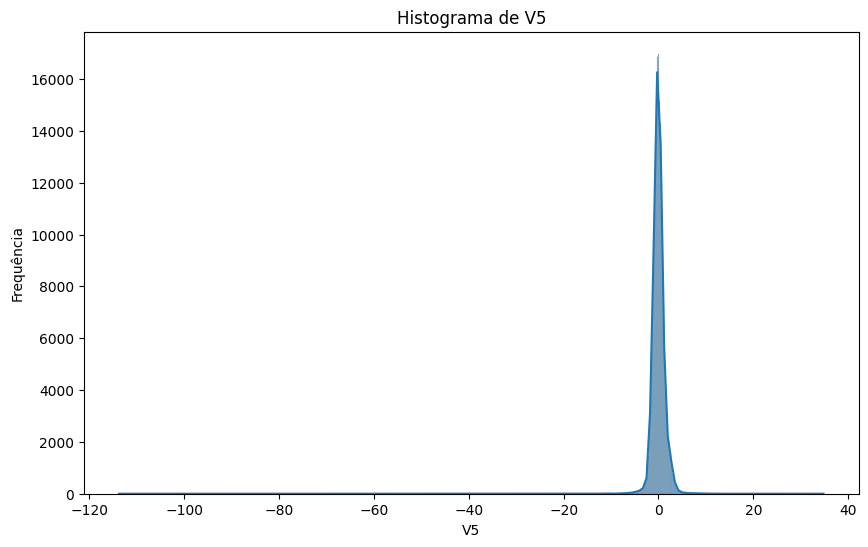

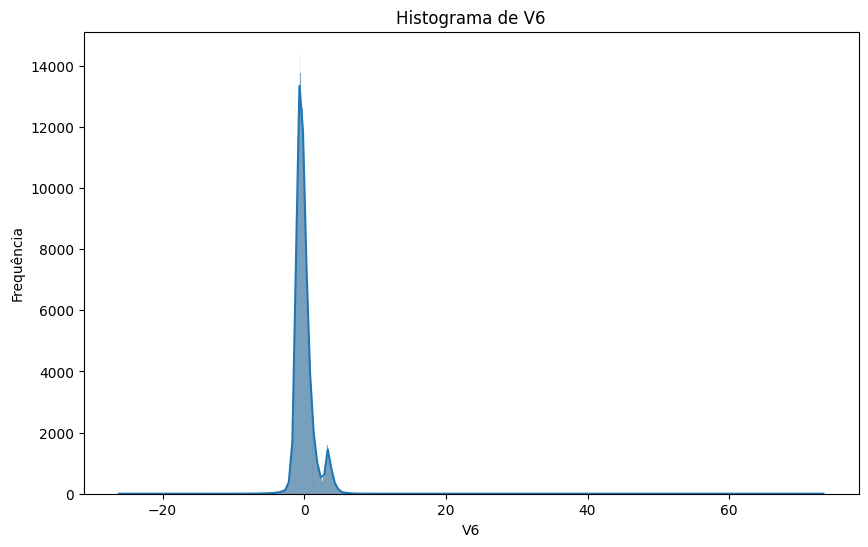

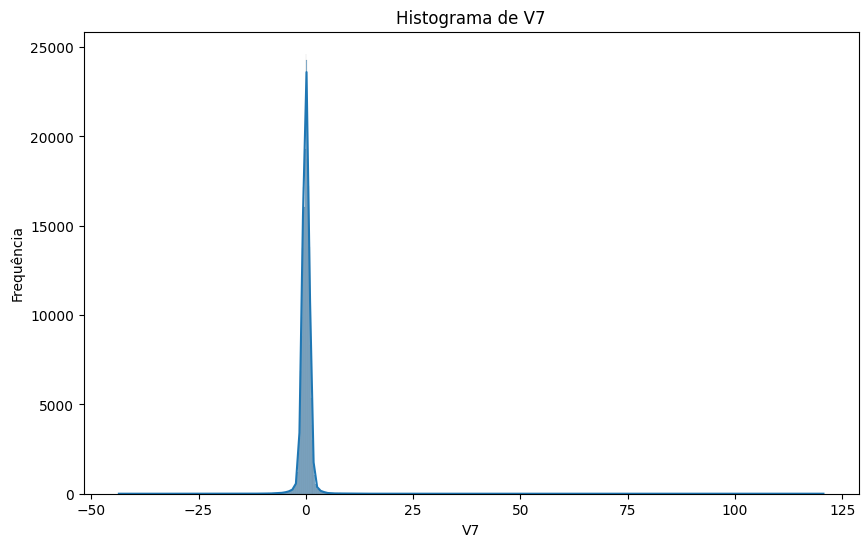

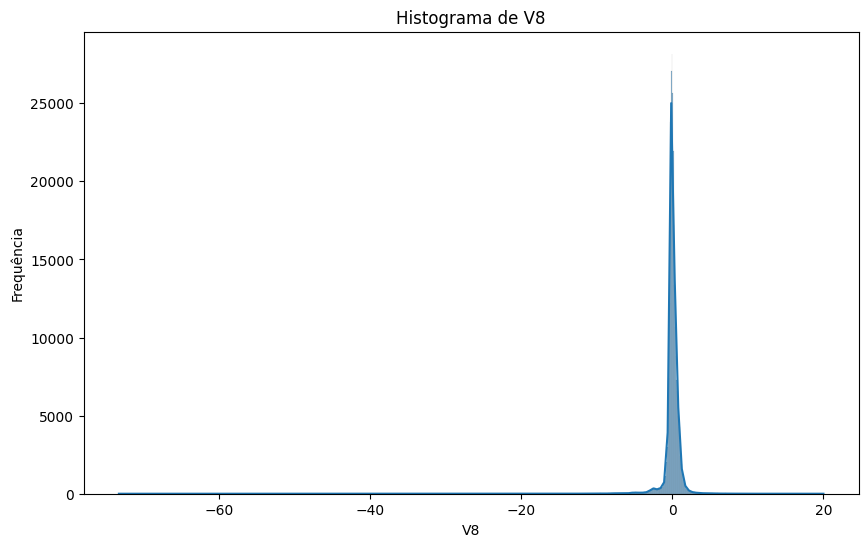

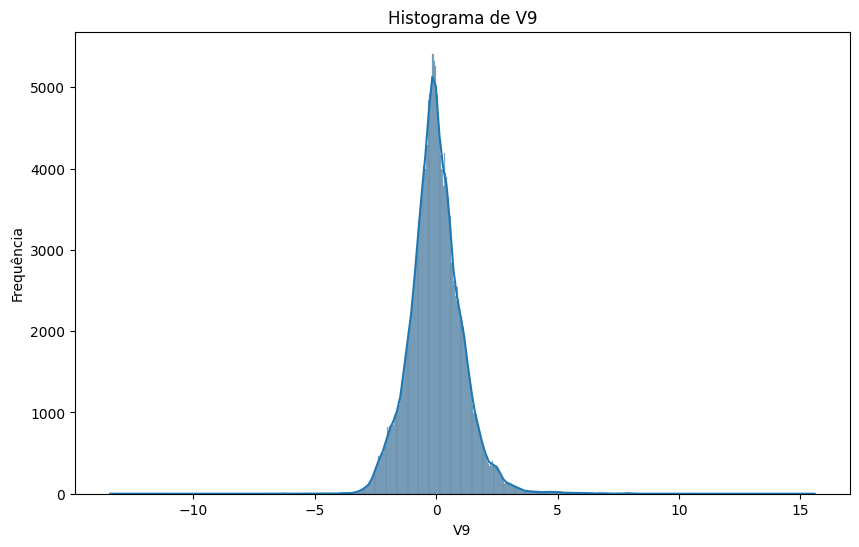

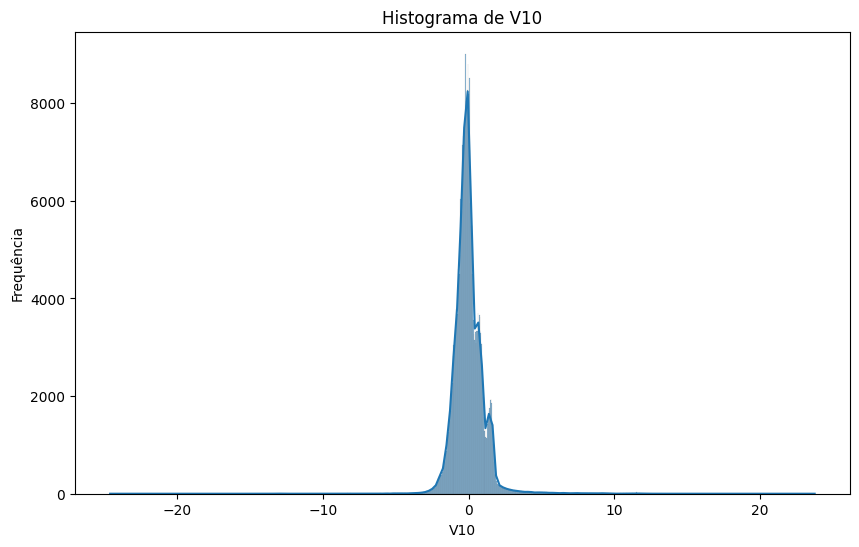

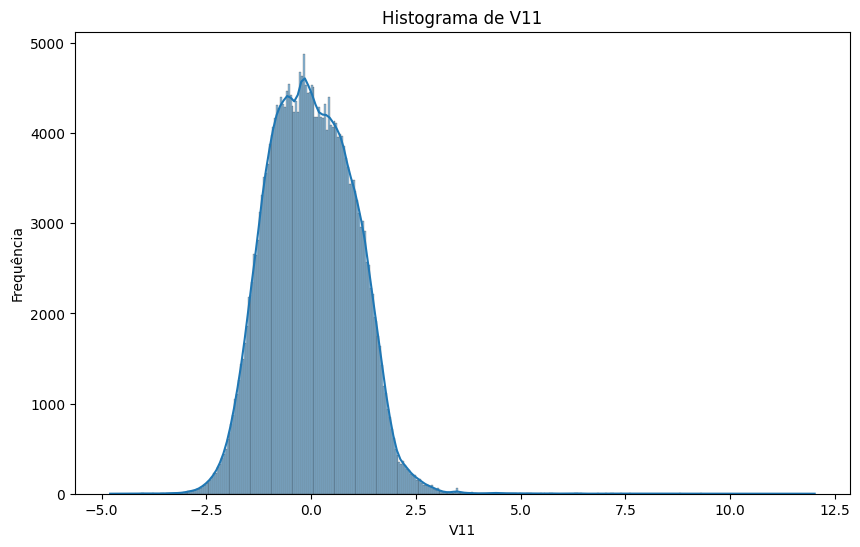

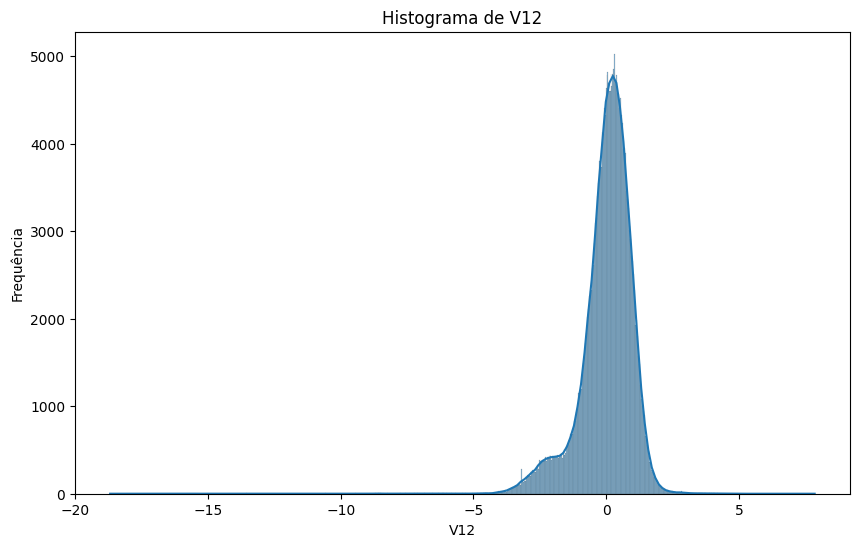

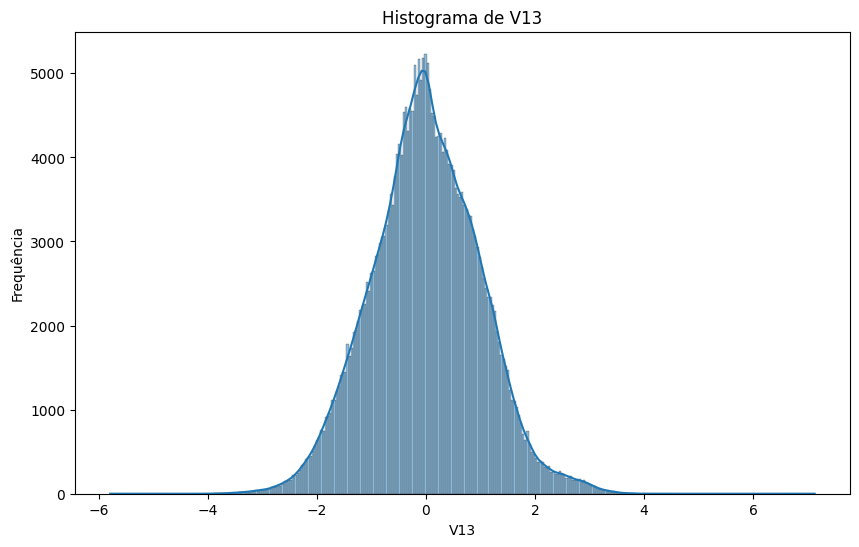

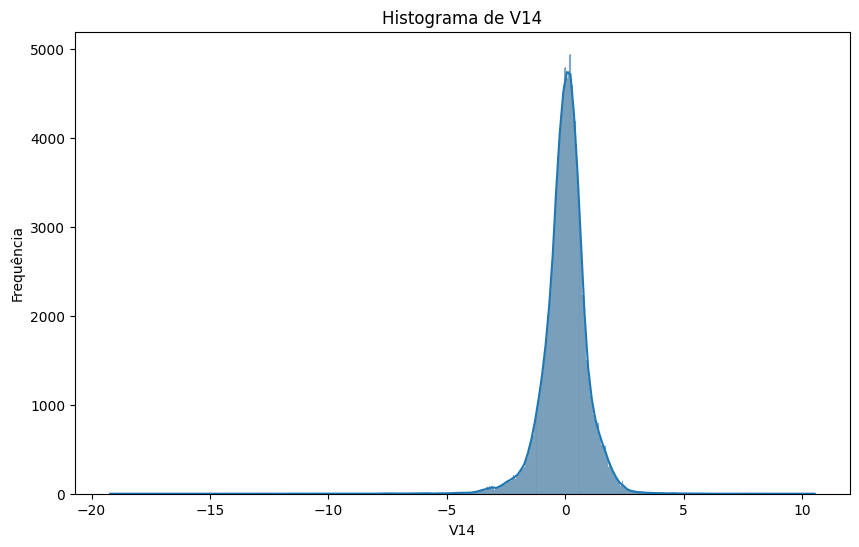

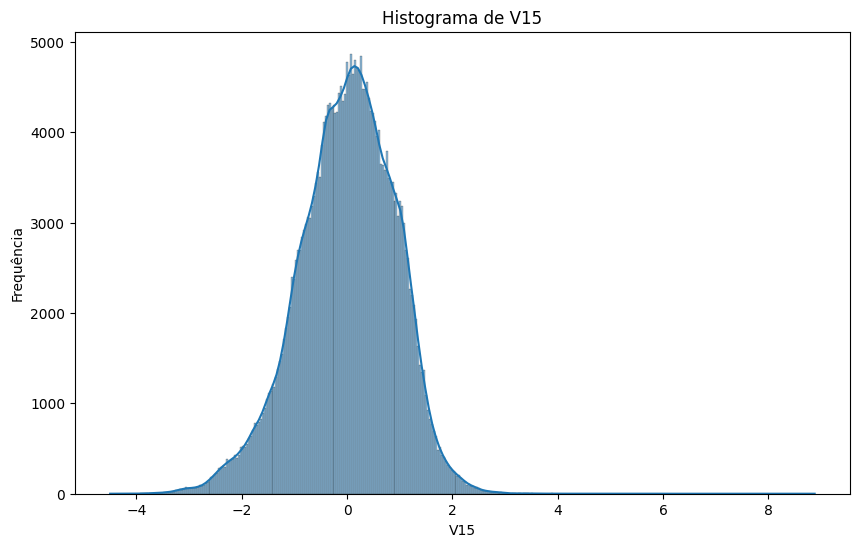

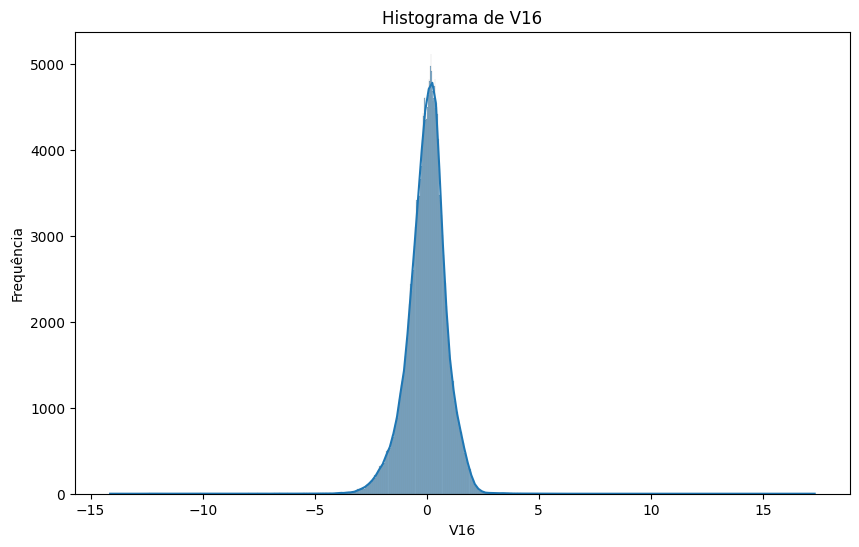

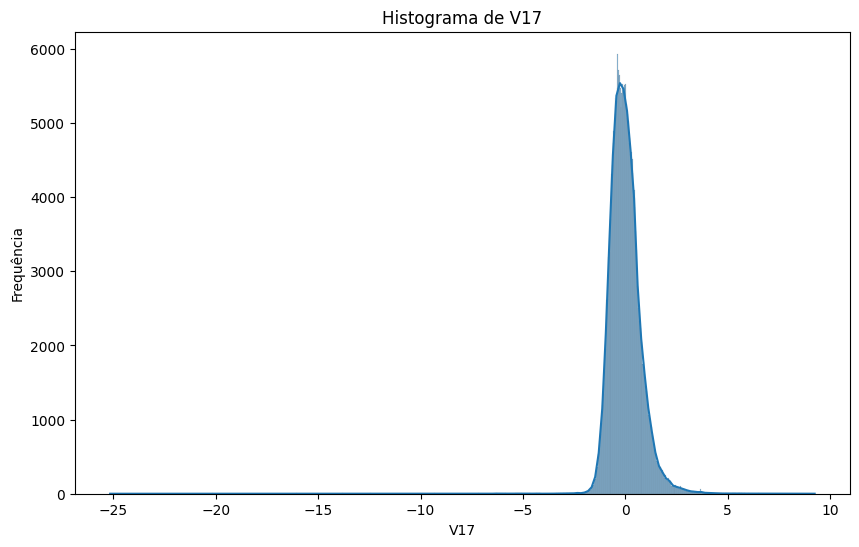

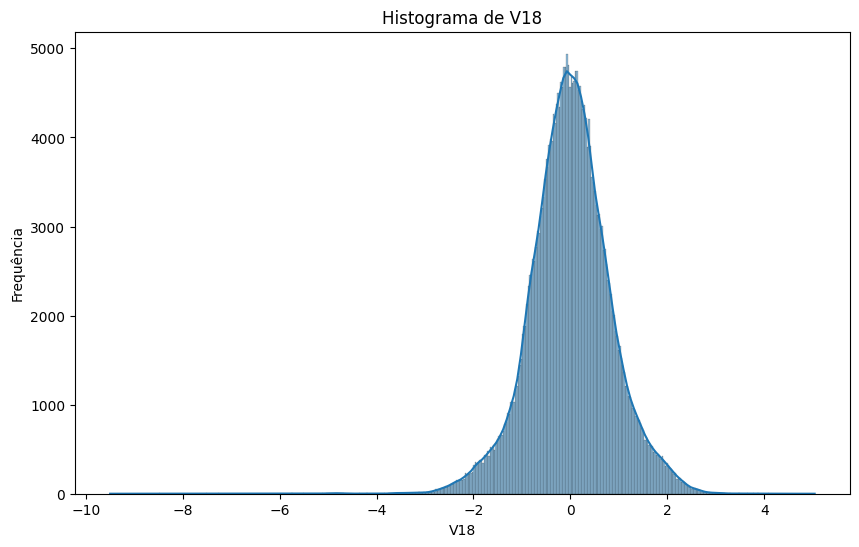

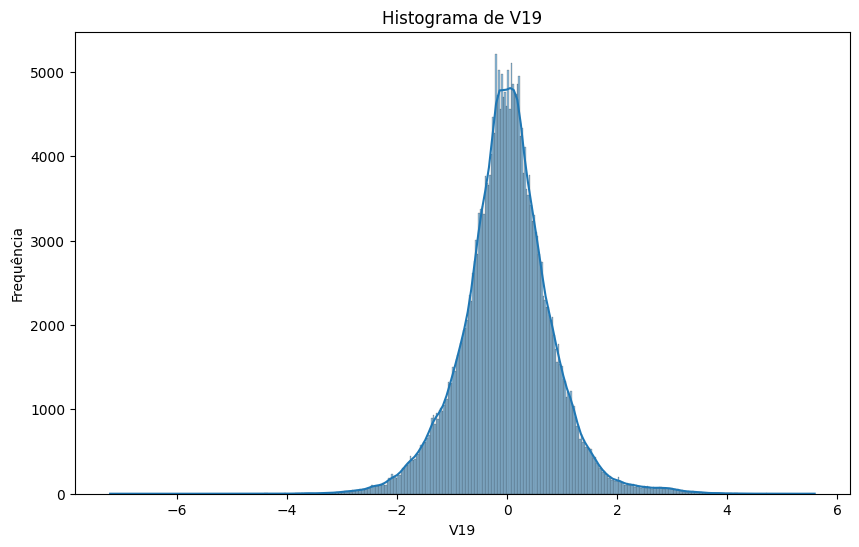

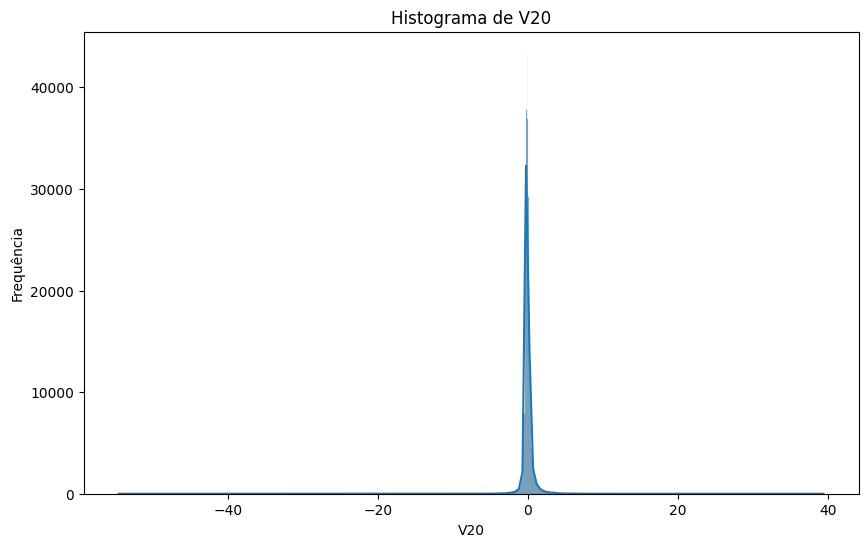

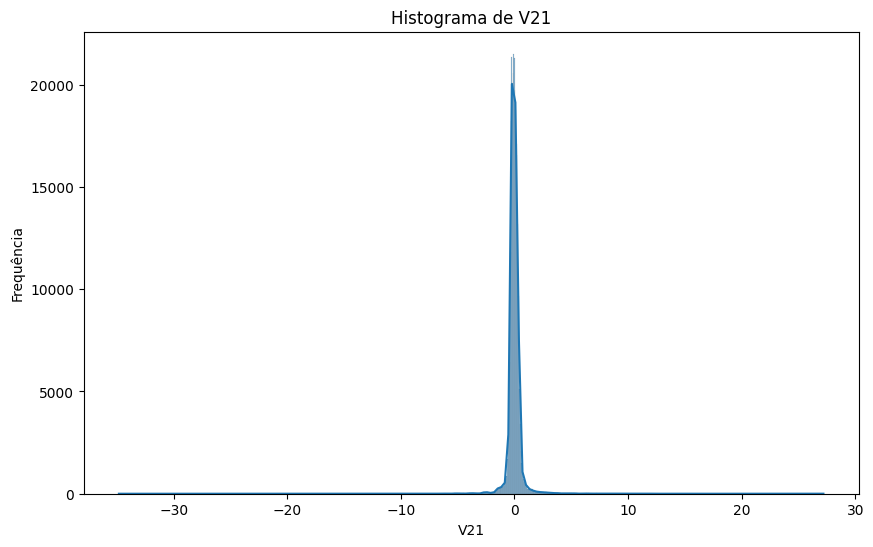

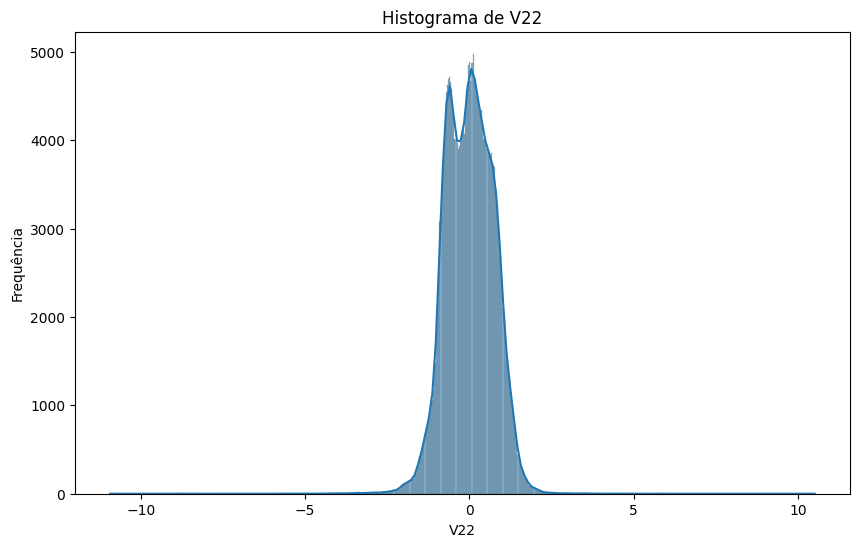

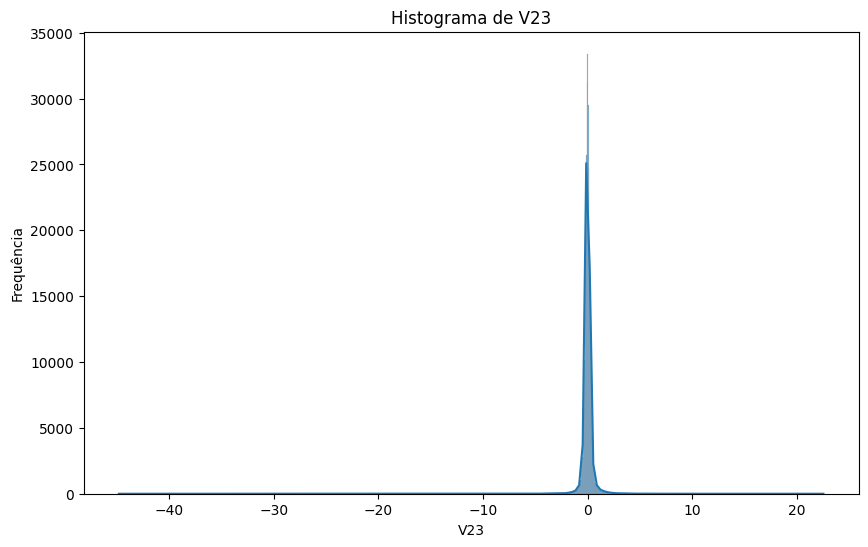

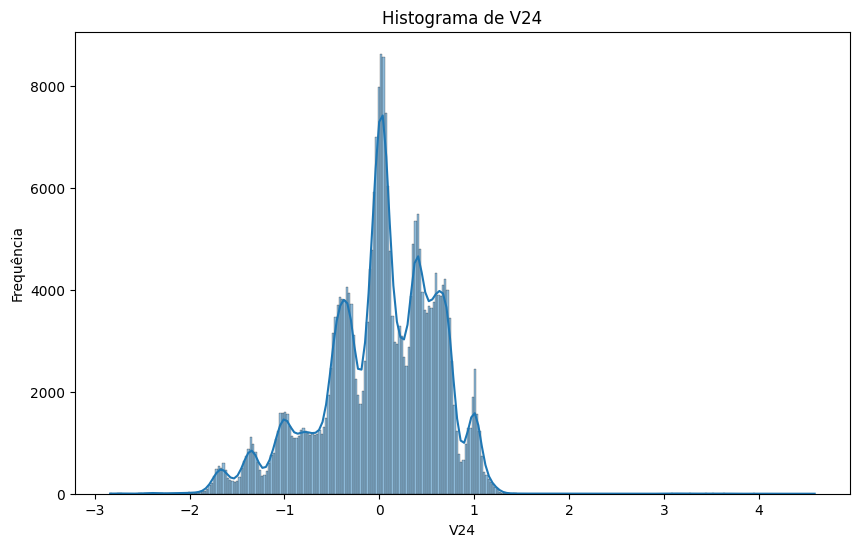

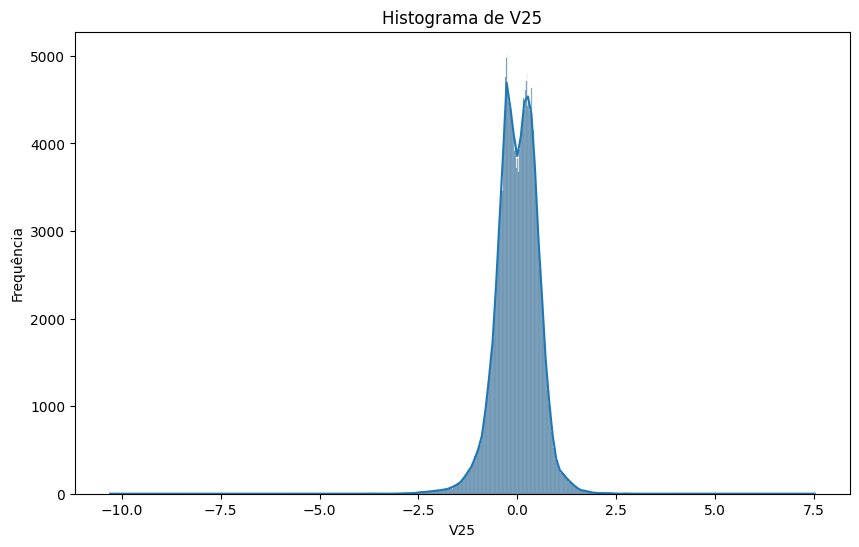

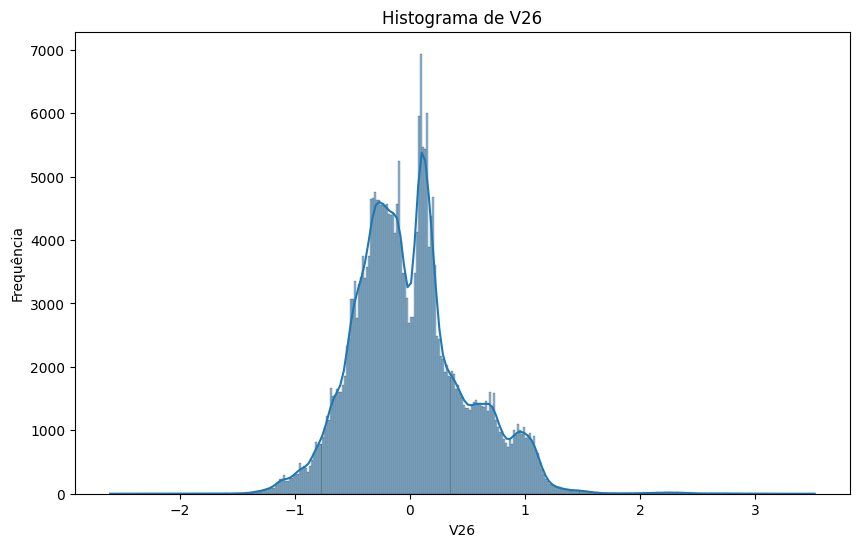

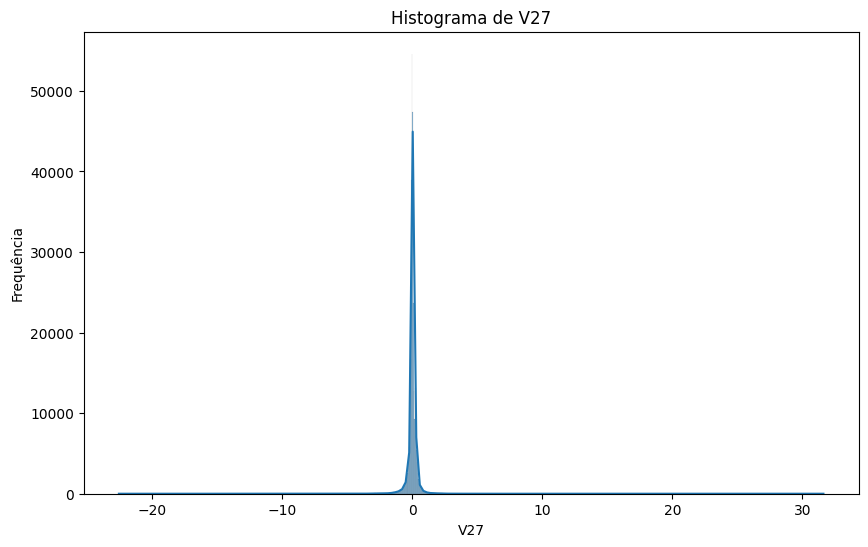

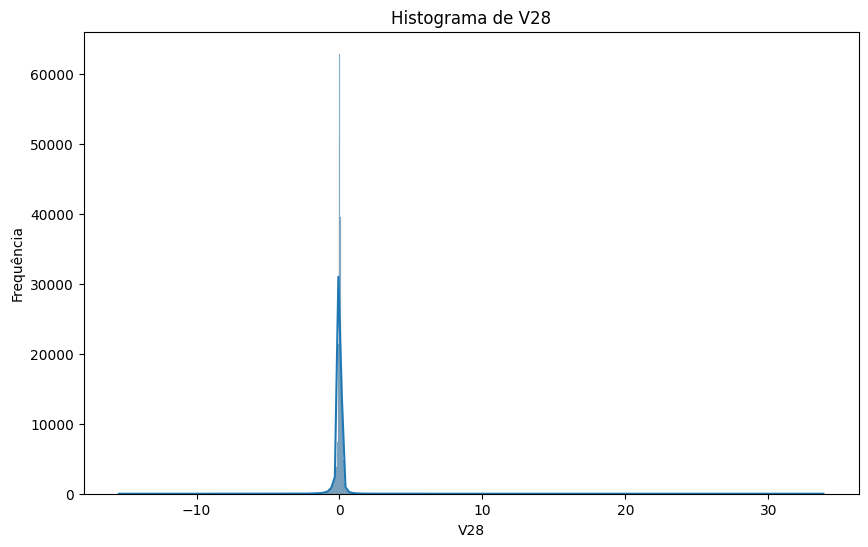

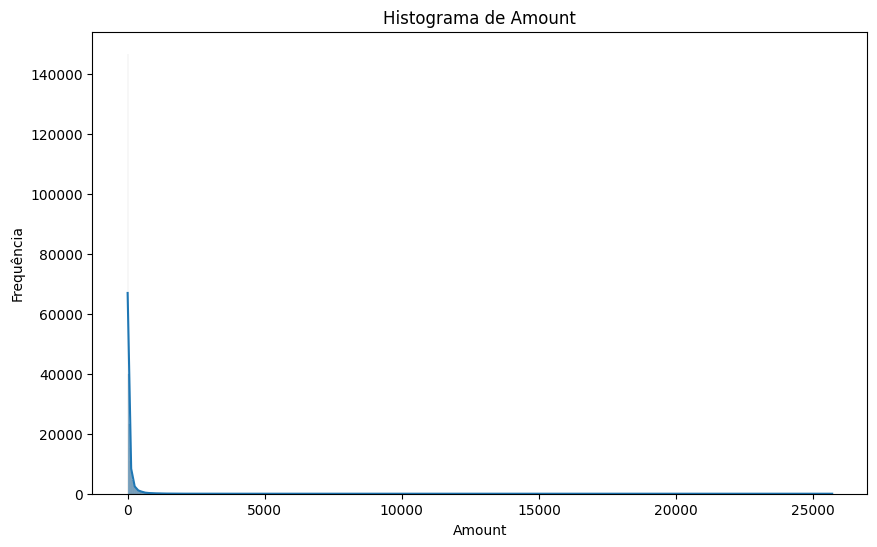

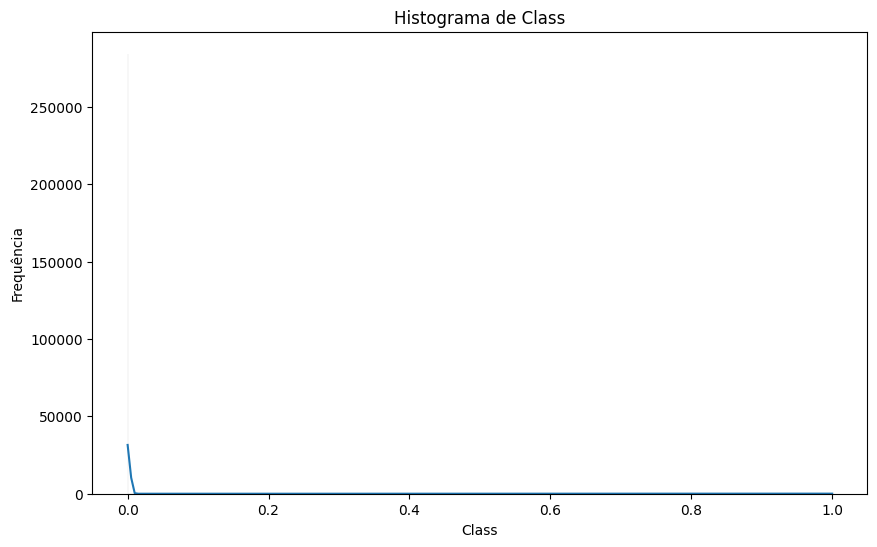

In [5]:
for col in df.columns:
  plot_histogram(df, col)

A partir das distribuições, é visível que as componentes V estão normalizadas. Entretanto, a componente Time e Amount ainda precisam de uma normalização para evitar que ela tenha um maior impacto no modelo pela sua maior grandeza escalar.

Por outro lado, não será preciso codificar nenhum valor textual, devido a inexistência dos mesmos.

Por fim, será necessário olhar com mais detalhes a distribuição da classe Class para compreender melhor o balaceamento das classes.

## Distribuição da classe alvo

In [6]:
class_distribution = df['Class'].value_counts(normalize=True) * 100
print("Distribuição da coluna 'Class' em porcentagem:")
class_distribution

Distribuição da coluna 'Class' em porcentagem:


Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

A partir dessa distribuição desigual, será necessário utilizar métricas e uma função de perca que leve o desbalanceamento em consideração.

# Pré-processamento

## Separação de treino / validação / teste

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.10, random_state=42, stratify=y_train_val)

print("Shape dos conjuntos de dados:")
print(f"Treino: X={X_train.shape}, y={y_train.shape}")
print(f"Validação: X={X_val.shape}, y={y_val.shape}")
print(f"Teste: X={X_test.shape}, y={y_test.shape}")

Shape dos conjuntos de dados:
Treino: X=(217876, 30), y=(217876,)
Validação: X=(24209, 30), y=(24209,)
Teste: X=(42722, 30), y=(42722,)


## Normalização dos dados

Criação da função de normalização

In [10]:
import json
from sklearn.preprocessing import StandardScaler

def normalize_and_save_params(df, columns_to_normalize, output_json_path='normalization_params.json'):
    """
    Normaliza colunas de um DataFrame usando StandardScaler e salva os parâmetros (média e desvio padrão).

    Args:
        df: DataFrame do pandas.
        columns_to_normalize: Lista de nomes das colunas a serem normalizadas.
        output_json_path: Caminho para o arquivo JSON onde os parâmetros serão salvos.

    Returns:
        DataFrame com as colunas normalizadas.
    """
    scaler = StandardScaler()
    df_normalized = df.copy()
    df_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

    normalization_params = {}
    for i, col in enumerate(columns_to_normalize):
        normalization_params[col] = {
            'mean': scaler.mean_[i],
            'std': scaler.scale_[i]
        }

    with open(output_json_path, 'w') as f:
        json.dump(normalization_params, f, indent=4)

    print(f"Parâmetros de normalização salvos em '{output_json_path}'")
    return df_normalized

def apply_normalization(df, json_params_path='normalization_params.json'):
    """
    Aplica normalização a colunas de um DataFrame usando parâmetros de um arquivo JSON.

    Args:
        df: DataFrame do pandas a ser normalizado.
        json_params_path: Caminho para o arquivo JSON contendo os parâmetros de normalização.

    Returns:
        DataFrame com as colunas normalizadas.
    """
    with open(json_params_path, 'r') as f:
        normalization_params = json.load(f)

    df_normalized = df.copy()
    for col, params in normalization_params.items():
        mean = params['mean']
        std = params['std']
        # Apply normalization: (x - mean) / std
        df_normalized[col] = (df_normalized[col] - mean) / std

    print(f"Normalização aplicada usando parâmetros de '{json_params_path}'")
    return df_normalized

Aplicação da função de normalização: gera a média e o desvio-padrão pelo treino e normaliza o treino, validação e teste com os dados do treino. A escolha de utilizar a média e o desvio-padrão do treino para padronizar a validação e teste serve para evitar que o modelo adquira informações desses outros datasets.

In [11]:
X_train_norm = normalize_and_save_params(X_train, ["Time", "Amount"])
X_val_norm = apply_normalization(X_val, 'normalization_params.json')
X_test_norm = apply_normalization(X_test, 'normalization_params.json')

Parâmetros de normalização salvos em 'normalization_params.json'
Normalização aplicada usando parâmetros de 'normalization_params.json'
Normalização aplicada usando parâmetros de 'normalization_params.json'


### Verificação rápida da normalização

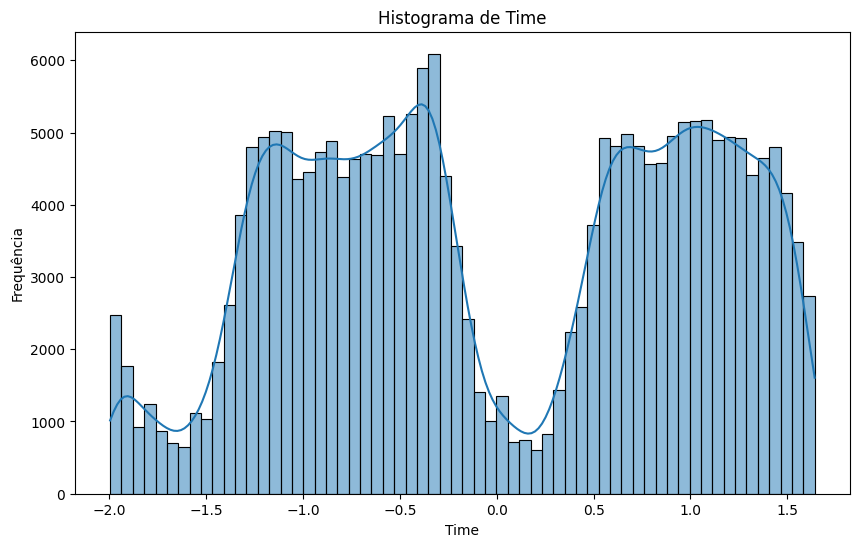

In [12]:
plot_histogram(X_train_norm, 'Time')

# Geração de Modelos

## Definição das métricas utilizadas

In [13]:
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_metrics():
  precision = Precision(name="precision")
  recall = Recall(name="recall")
  auc_roc = AUC(name='auc_roc')
  auc_pr = AUC(curve='PR', name='auc_pr')
  return [precision, recall, auc_roc, auc_pr]

## Função Básica para criação do Modelo

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint

# criar o callback para salvar o melhor modelo
checkpoint_callback = ModelCheckpoint(
    filepath='baseline_model.keras',
    monitor='val_precision',
    save_best_only=True
)

def generate_model(optimizer='adam', loss='binary_crossentropy'):
  inputs = layers.Input(shape=(X_train_norm.shape[1],))
  x = layers.Dense(512, activation='relu')(inputs)
  x = layers.Dense(256, activation='relu')(x)
  x = layers.Dense(128, activation='relu')(x)
  output = layers.Dense(1, activation='sigmoid')(x)
  model = tf.keras.Model(inputs=inputs, outputs=output)

  model.compile(optimizer=optimizer,
                loss=loss,
                metrics=[*get_metrics()])

  return model

model = generate_model()
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │        15,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 180,225 (704.00 KB)

 Trainable params: 180,225 (704.00 KB)

 Non-trainable params: 0 (0.00 B)

## Função para plotar as métricas

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def plot_history_data(history):
    # Plot Loss
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Precision
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['precision'], label='Training Precision')
    plt.plot(history.history['val_precision'], label='Validation Precision')
    plt.title('Model Precision over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Recall
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['recall'], label='Training Recall')
    plt.plot(history.history['val_recall'], label='Validation Recall')
    plt.title('Model Recall over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Compute F1-Score
    train_precision = np.array(history.history['precision'])
    train_recall = np.array(history.history['recall'])
    val_precision = np.array(history.history['val_precision'])
    val_recall = np.array(history.history['val_recall'])

    train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall + 1e-8)
    val_f1 = 2 * (val_precision * val_recall) / (val_precision + val_recall + 1e-8)

    # Plot F1-Score
    plt.figure(figsize=(12, 6))
    plt.plot(train_f1, label='Training F1-Score')
    plt.plot(val_f1, label='Validation F1-Score')
    plt.title('Model F1-Score over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('F1-Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot AUC ROC
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['auc_roc'], label='Training AUC-ROC')
    plt.plot(history.history['val_auc_roc'], label='Validation AUC-ROC')
    plt.title('Model AUC-ROC over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('AUC-ROC')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot AUC PR
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['auc_pr'], label='Training AUC-PR')
    plt.plot(history.history['val_auc_pr'], label='Validation AUC-PR')
    plt.title('Model AUC-PR over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('AUC-ROC')
    plt.legend()
    plt.grid(True)
    plt.show()


## Primeiro Modelo (Baseline)

O primeiro modelo será utilizado as compilação padrão da função: (loss=binary_crossentropy, optimizer=adam). Além disso, as classes serão balanceadas na função de perda utilizando class_weights. 

In [20]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

In [21]:
history = model.fit(
    X_train_norm,
    y_train,
    epochs=25,
    validation_data=(X_val_norm, y_val),
    class_weight=class_weight_dict,
    callbacks=[checkpoint_callback]
)

Epoch 1/25
6809/6809 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - auc_pr: 0.1260 - auc_roc: 0.9303 - loss: 1.0734 - precision: 0.0344 - recall: 0.8431 - val_auc_pr: 0.0763 - val_auc_roc: 0.9831 - val_loss: 0.6263 - val_precision: 0.0089 - val_recall: 0.9762
Epoch 2/25
6809/6809 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - auc_pr: 0.0355 - auc_roc: 0.9235 - loss: 2.2827 - precision: 0.0218 - recall: 0.8750 - val_auc_pr: 0.0029 - val_auc_roc: 0.6970 - val_loss: 20.9679 - val_precision: 0.0022 - val_recall: 1.0000
Epoch 3/25
6809/6809 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - auc_pr: 0.0268 - auc_roc: 0.9339 - loss: 3.5295 - precision: 0.0225 - recall: 0.9096 - val_auc_pr: 0.0128 - val_auc_roc: 0.9330 - val_loss: 9.7111 - val_precision: 0.0118 - val_recall: 1.0000
Epoch 4/25
6809/6809 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - auc_pr: 0.0352 - auc_roc: 0.9368 - loss: 6.0281 - precision: 0.0330 - recall: 0.9122 - val_auc_pr: 0.2481 - val_auc_roc: 0.9502 - val_loss: 0.6422 - val_precision: 0.2331 - val_recall: 0.9048
Epo

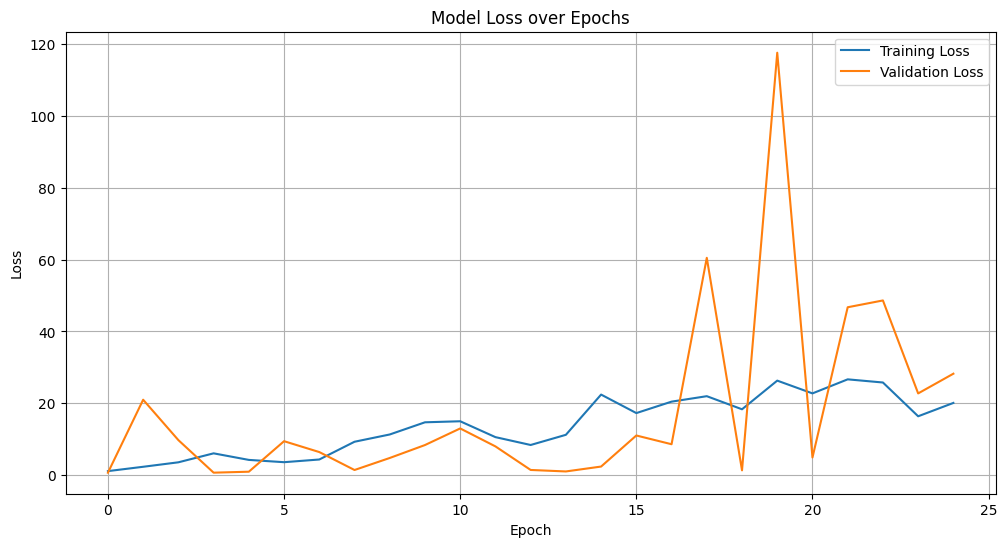

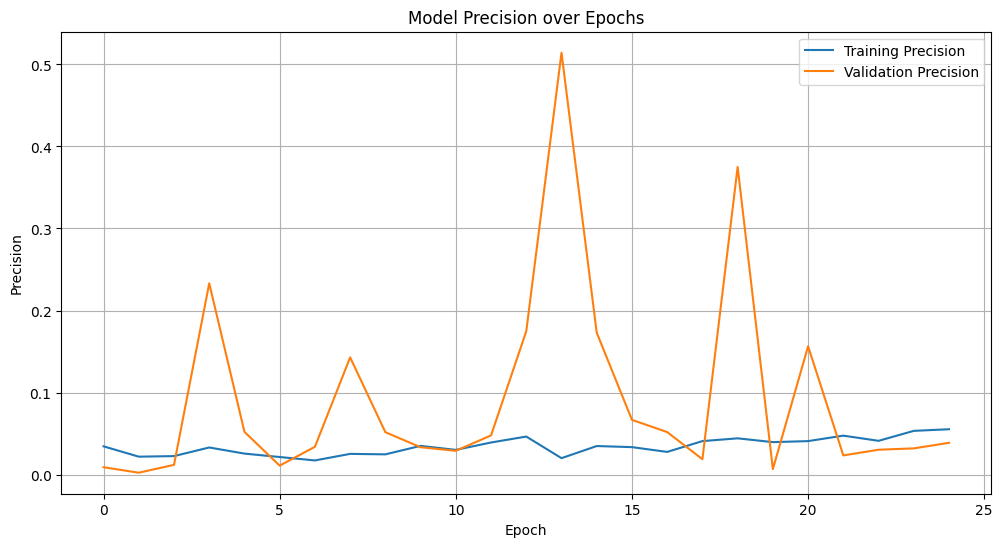

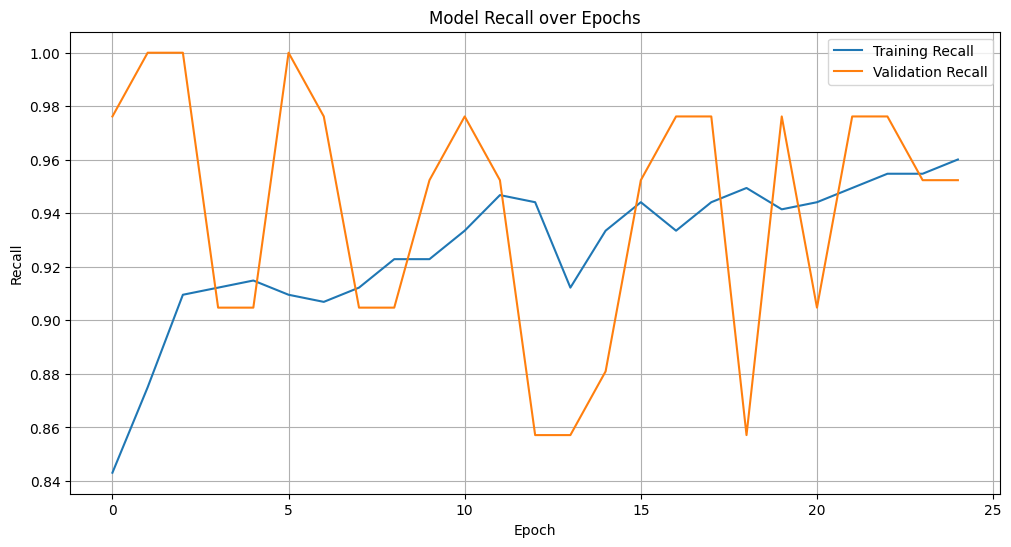

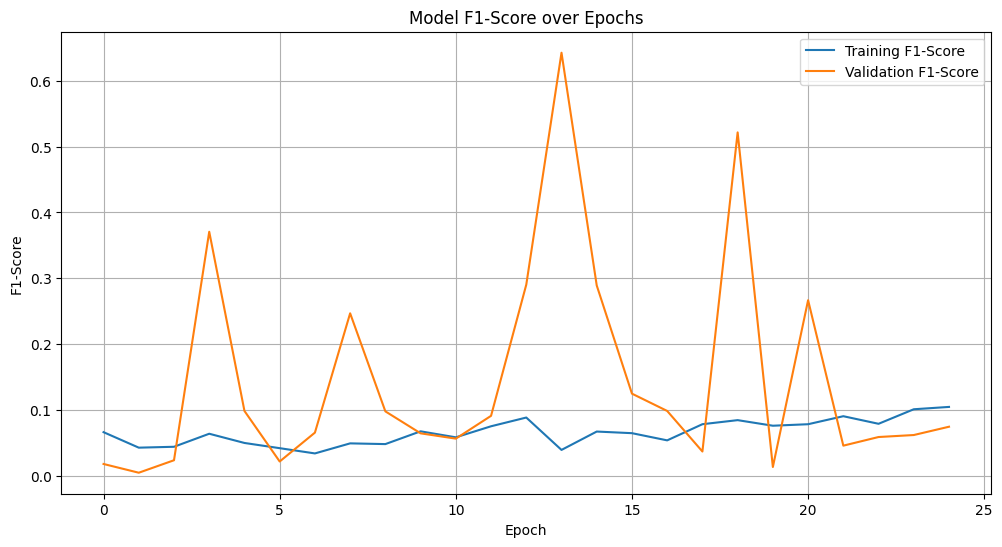

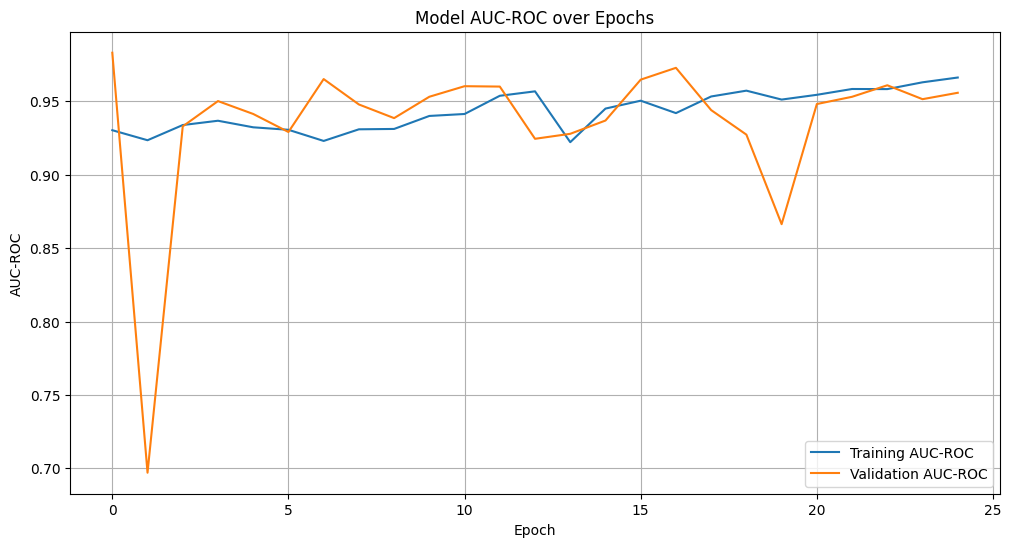

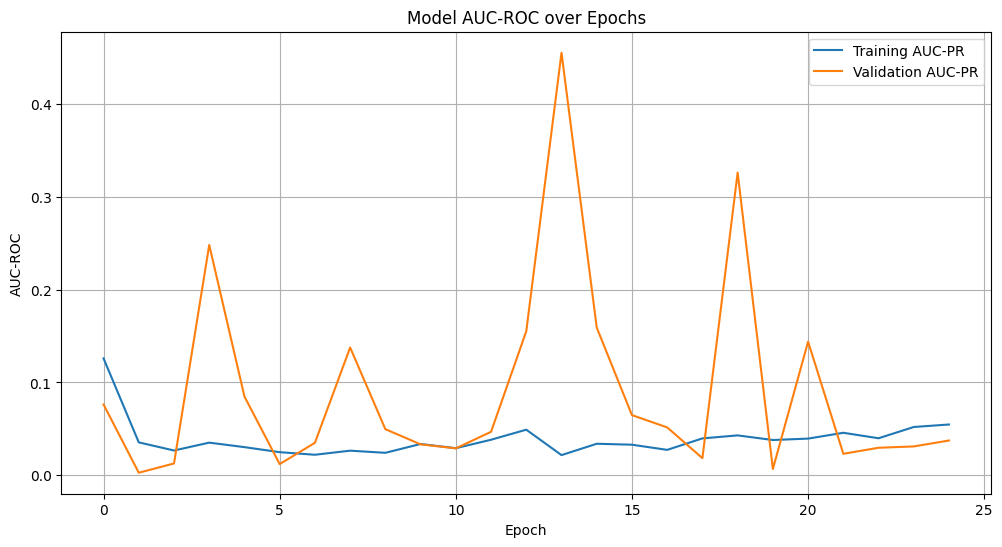

In [22]:
plot_history_data(history)

O modelo ainda não se demonstra capaz de lidar com as classes desbalanceadas, nem no treino ele é capaz de overfittar em relação ao target 01 (F1-score, precision). Portanto, é lógico compreender que a função de perca do modelo não é a mais adequada para lidar com o desbalanceamento, mesmo com o class weights ativo.

## Outros modelos

### Definição das outras funções de perca e otimizadores

#### Funções de perca

Aqui estão elencadas algumas funções de perca que lidam melhor com o cenário de classes desbalanceadas que temos

In [23]:
import tensorflow as tf
from tensorflow.keras import backend as K

def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        cross_entropy = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
        weight = alpha * K.pow(1 - y_pred, gamma) * y_true + (1 - alpha) * K.pow(y_pred, gamma) * (1 - y_true)
        return K.mean(weight * cross_entropy)
    return loss

In [24]:
def soft_f1_loss(y_true, y_pred):
    y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
    tp = K.sum(y_true * y_pred)
    fp = K.sum((1 - y_true) * y_pred)
    fn = K.sum(y_true * (1 - y_pred))
    soft_f1 = 2 * tp / (2 * tp + fp + fn + K.epsilon())
    return 1 - soft_f1

In [25]:
def logit_adjusted_bce(pos_prior=0.01):
    adj = tf.cast(tf.math.log(pos_prior / (1 - pos_prior)), tf.float32)

    def loss(y_true, y_pred_logits):
        y_pred_logits = y_pred_logits - adj
        return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=y_pred_logits))

    return loss


In [26]:
distribution = y_train.value_counts()
pos_prior = y_train.value_counts()[1] / (y_train.value_counts()[0] + y_train.value_counts()[1])
logit = logit_adjusted_bce(pos_prior=pos_prior)

loss_functions = ["focal_loss", "soft_f1", "logit_adjusted_bce", "binary_crossentropy"]

def _resolve_loss(name):
    if name == "binary_crossentropy":
        return "binary_crossentropy"
    if name == "focal_loss":
        return focal_loss()
    if name == "soft_f1":
        return soft_f1_loss
    if name == "logit_adjusted_bce":
        pos_prior = y_train.value_counts()[1] / y_train.shape[0]
        return logit_adjusted_bce(pos_prior=pos_prior)
    raise ValueError(f"Unknown loss: {name}")


#### Funções de Otimização

In [27]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.optimizers import Adam

optimizers = ["adam", "adamW", "rmsprop", "nadam"]

def _resolve_optimizer(name):
    if name == "adam":
        return Adam()
    if name == "adamW":
        return AdamW(weight_decay=1e-4)
    if name == "rmsprop":
        return RMSprop()
    if name == "nadam":
        return Nadam()
    raise ValueError(f"Unknown optimizer: {name}")

### Busca de hiperparâmetros 

Para realizar a bus

### Busca com RandomSearch

In [29]:
import tensorflow as tf
import keras_tuner as kt

def build_model(hp):
    loss = hp.Choice("loss", loss_functions)
    optimizer = hp.Choice("optimizer", optimizers)

    model = generate_model(loss=loss, optimizer=optimizer)
    return model

hp = kt.HyperParameters()

def build_model(hp):
    loss_name = hp.Choice("loss", loss_functions)
    opt_name = hp.Choice("optimizer", optimizers)

    loss = _resolve_loss(loss_name)
    opt = _resolve_optimizer(opt_name)

    model = generate_model(optimizer=opt, loss=loss)
    return model

lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3)

tuner_random = kt.RandomSearch(
    build_model,
    objective="val_precision",
    max_trials=5,
    overwrite=True,
    directory="my_dir",
    project_name="optimize_optimizer"
)

tuner_random.search(
    X_train_norm, y_train,
    epochs=10,
    validation_data=(X_val_norm, y_val),
    callbacks=[lr_scheduler]
)

Trial 5 Complete [00h 03m 49s]
val_precision: 0.0

Best val_precision So Far: 1.0
Total elapsed time: 00h 18m 54s


In [30]:
tuner_random.results_summary()

Results summary
Results in my_dir\optimize_optimizer
Showing 10 best trials
Objective(name="val_precision", direction="max")

Trial 3 summary
Hyperparameters:
loss: focal_loss
optimizer: adam
Score: 1.0

Trial 0 summary
Hyperparameters:
loss: binary_crossentropy
optimizer: rmsprop
Score: 0.8387096524238586

Trial 1 summary
Hyperparameters:
loss: soft_f1
optimizer: rmsprop
Score: 0.8181818127632141

Trial 2 summary
Hyperparameters:
loss: soft_f1
optimizer: adam
Score: 0.8181818127632141

Trial 4 summary
Hyperparameters:
loss: logit_adjusted_bce
optimizer: nadam
Score: 0.0


## Modelo com GridSearch

In [31]:

hp = kt.HyperParameters()

tuner_grid = kt.GridSearch(
    build_model,
    objective="val_precision",
    max_trials=5,
    overwrite=True,
    directory="my_dir",
    project_name="optimize_optimizer"
)

tuner_grid.search(
    X_train_norm, y_train,
    epochs=10,
    validation_data=(X_val_norm, y_val),
    callbacks=[lr_scheduler]
)

Trial 5 Complete [00h 07m 51s]
val_precision: 0.0

Best val_precision So Far: 1.0
Total elapsed time: 04h 51m 19s


In [32]:
tuner_grid.results_summary()

Results summary
Results in my_dir\optimize_optimizer
Showing 10 best trials
Objective(name="val_precision", direction="max")

Trial 0 summary
Hyperparameters:
loss: focal_loss
optimizer: adam
Score: 1.0

Trial 1 summary
Hyperparameters:
loss: focal_loss
optimizer: adamW
Score: 1.0

Trial 3 summary
Hyperparameters:
loss: focal_loss
optimizer: nadam
Score: 1.0

Trial 2 summary
Hyperparameters:
loss: focal_loss
optimizer: rmsprop
Score: 0.9354838728904724

Trial 4 summary
Hyperparameters:
loss: soft_f1
optimizer: adam
Score: 0.0


## Conclusão

Após a aplicação das técnicas de ajuste fino de hiperparâmetros, foi possível observar uma melhora significativa na performance do modelo. O F1-Score, que inicialmente era de aproximadamente 0.6, aumentou para cerca de 0.8 após a otimização, evidenciando o impacto positivo do uso de funções de perda e otimizadores mais adequados ao cenário de classes desbalanceadas.

Apesar desse avanço, o modelo ainda apresenta dificuldades de generalização, principalmente devido ao ruído causado por outliers presentes no conjunto de dados. Para mitigar esse problema, recomenda-se a aplicação de técnicas de detecção e remoção de outliers, como o uso de métodos baseados em z-score ou IQR (intervalo interquartil). Essas abordagens podem contribuir para um modelo mais robusto e com melhor capacidade de generalização em cenários reais.